In [7]:
import os
# Java 8 path
os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/temurin-8.jdk/Contents/Home'

# PySpark path
os.environ['SPARK_HOME'] = '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyspark'

In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,mean,min,max,count,stddev
import numpy as np 
import pandas as pd 

spark = SparkSession.builder.appName("Correlation Analysis").getOrCreate()

In [11]:
anscombe_data = [

    (10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58),

    (8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76),

    (13.0, 7.58, 13.0, 8.74, 13.0, 12.74, 8.0, 7.71),

    (9.0, 8.81, 9.0, 8.77, 9.0, 7.11, 8.0, 8.84),

    (11.0, 8.33, 11.0, 9.26, 11.0, 7.81, 8.0, 8.47),

    (14.0, 9.96, 14.0, 8.10, 14.0, 8.84, 8.0, 7.04),

    (6.0, 7.24, 6.0, 6.13, 6.0, 6.08, 8.0, 5.25),

    (4.0, 4.26, 4.0, 3.10, 4.0, 5.39, 19.0, 12.50),

    (12.0, 10.84, 12.0, 9.13, 12.0, 8.15, 8.0, 5.56),

    (7.0, 4.82, 7.0, 7.26, 7.0, 6.42, 8.0, 7.91),

    (5.0, 5.68, 5.0, 4.74, 5.0, 5.73, 8.0, 6.89)

]

In [13]:
columns = ['x1','y1','x2','y2','x3','y3','x4','y4']
anscombe_df = spark.createDataFrame(anscombe_data,columns)
anscombe_df.show()

+----+-----+----+----+----+-----+----+----+
|  x1|   y1|  x2|  y2|  x3|   y3|  x4|  y4|
+----+-----+----+----+----+-----+----+----+
|10.0| 8.04|10.0|9.14|10.0| 7.46| 8.0|6.58|
| 8.0| 6.95| 8.0|8.14| 8.0| 6.77| 8.0|5.76|
|13.0| 7.58|13.0|8.74|13.0|12.74| 8.0|7.71|
| 9.0| 8.81| 9.0|8.77| 9.0| 7.11| 8.0|8.84|
|11.0| 8.33|11.0|9.26|11.0| 7.81| 8.0|8.47|
|14.0| 9.96|14.0| 8.1|14.0| 8.84| 8.0|7.04|
| 6.0| 7.24| 6.0|6.13| 6.0| 6.08| 8.0|5.25|
| 4.0| 4.26| 4.0| 3.1| 4.0| 5.39|19.0|12.5|
|12.0|10.84|12.0|9.13|12.0| 8.15| 8.0|5.56|
| 7.0| 4.82| 7.0|7.26| 7.0| 6.42| 8.0|7.91|
| 5.0| 5.68| 5.0|4.74| 5.0| 5.73| 8.0|6.89|
+----+-----+----+----+----+-----+----+----+



In [16]:
dataset1 = anscombe_df.select('x1','y1')
dataset1.show()

+----+-----+
|  x1|   y1|
+----+-----+
|10.0| 8.04|
| 8.0| 6.95|
|13.0| 7.58|
| 9.0| 8.81|
|11.0| 8.33|
|14.0| 9.96|
| 6.0| 7.24|
| 4.0| 4.26|
|12.0|10.84|
| 7.0| 4.82|
| 5.0| 5.68|
+----+-----+



In [19]:
summary = dataset1.select(
    mean('x1'),
    stddev('x1'),
    min('x1'),
    mean('y1'),
    stddev('y1')
)
summary.show()

+-------+------------------+-------+-----------------+-----------------+
|avg(x1)|   stddev_samp(x1)|min(x1)|          avg(y1)|  stddev_samp(y1)|
+-------+------------------+-------+-----------------+-----------------+
|    9.0|3.3166247903553994|    4.0|7.500909090909091|2.031568135925815|
+-------+------------------+-------+-----------------+-----------------+



In [20]:
dataset1_pd = dataset1.toPandas()

In [21]:
dataset1_pd.describe()

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [26]:
correlation = np.corrcoef(dataset1_pd['x1'],dataset1_pd['y1'])
correlation

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [27]:
correlation = correlation[0,1]
correlation

0.81642051634484

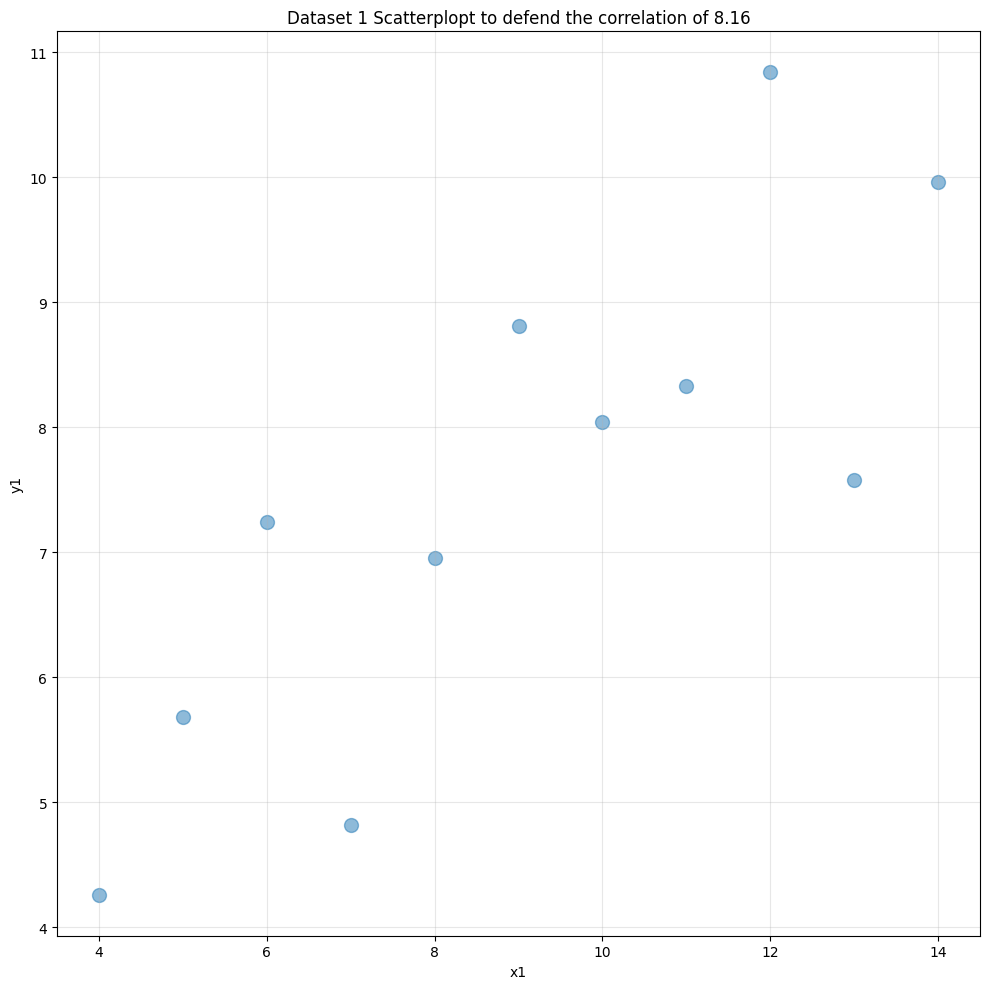

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
plt.scatter(dataset1_pd['x1'],dataset1_pd['y1'], alpha = 0.5 , s =100)
plt.xlabel('x1')
plt.ylabel('y1')
plt.title("Dataset 1 Scatterplopt to defend the correlation of 8.16")
plt.grid(True, alpha = 0.3)
plt.tight_layout()

In [36]:
dataset2 = anscombe_df.select('x2','y2')
dataset2.show()

+----+----+
|  x2|  y2|
+----+----+
|10.0|9.14|
| 8.0|8.14|
|13.0|8.74|
| 9.0|8.77|
|11.0|9.26|
|14.0| 8.1|
| 6.0|6.13|
| 4.0| 3.1|
|12.0|9.13|
| 7.0|7.26|
| 5.0|4.74|
+----+----+



In [37]:
summary_2= dataset2.select(
    mean('x2'),
    stddev('x2'),
    min('x2'),
    mean('y2'),
    stddev('y2')
)
summary_2.show()

+-------+------------------+-------+----------------+------------------+
|avg(x2)|   stddev_samp(x2)|min(x2)|         avg(y2)|   stddev_samp(y2)|
+-------+------------------+-------+----------------+------------------+
|    9.0|3.3166247903553994|    4.0|7.50090909090909|2.0316567355016177|
+-------+------------------+-------+----------------+------------------+



In [41]:
dataset2_pd = dataset2.toPandas()
dataset2_pd.describe()

,x2,y2
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [46]:
correlation = np.corrcoef(dataset2_pd['x2'],dataset2_pd['y2'])
correlation

array([[1.        , 0.81623651],
       [0.81623651, 1.        ]])

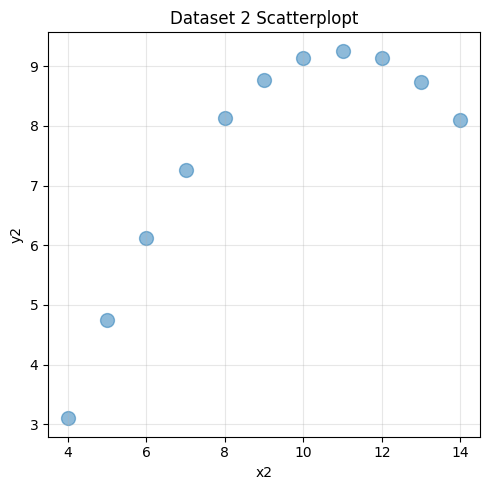

In [53]:
plt.figure(figsize =(5,5))
plt.scatter(dataset2_pd['x2'],dataset2_pd['y2'], alpha = 0.5 , s =100)
plt.xlabel('x2')
plt.ylabel('y2')
plt.title("Dataset 2 Scatterplopt")
plt.grid(True, alpha = 0.3)
plt.tight_layout()

In [48]:
dataset3= anscombe_df.select('x3','y3')
dataset3.show()

+----+-----+
|  x3|   y3|
+----+-----+
|10.0| 7.46|
| 8.0| 6.77|
|13.0|12.74|
| 9.0| 7.11|
|11.0| 7.81|
|14.0| 8.84|
| 6.0| 6.08|
| 4.0| 5.39|
|12.0| 8.15|
| 7.0| 6.42|
| 5.0| 5.73|
+----+-----+



In [49]:
dataset3_pd = dataset3.toPandas()
dataset3_pd.describe()

,x3,y3
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [50]:
correlation = np.corrcoef(dataset3_pd['x3'],dataset3_pd['y3'])
correlation

array([[1.        , 0.81628674],
       [0.81628674, 1.        ]])

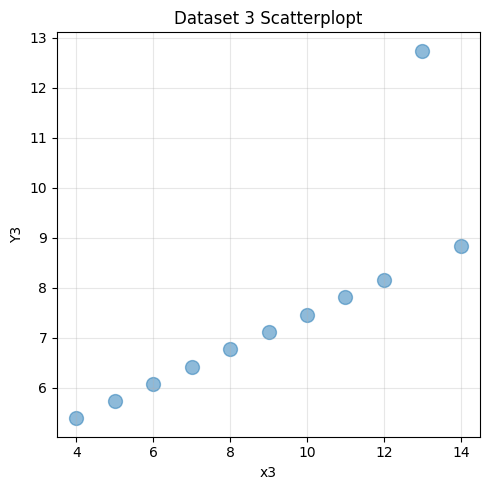

In [54]:
plt.figure(figsize =(5,5))
plt.scatter(dataset3_pd['x3'],dataset3_pd['y3'], alpha = 0.5 , s =100)
plt.xlabel('x3')
plt.ylabel('Y3')
plt.title("Dataset 3 Scatterplopt")
plt.grid(True, alpha = 0.3)
plt.tight_layout()

In [63]:
dataset4 = anscombe_df.select('x4','y4')
dataset4.show()

+----+----+
|  x4|  y4|
+----+----+
| 8.0|6.58|
| 8.0|5.76|
| 8.0|7.71|
| 8.0|8.84|
| 8.0|8.47|
| 8.0|7.04|
| 8.0|5.25|
|19.0|12.5|
| 8.0|5.56|
| 8.0|7.91|
| 8.0|6.89|
+----+----+



In [65]:
dataset4_pd = dataset4.toPandas()
dataset4_pd.describe()

,x4,y4
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [66]:
correlation = np.corrcoef(dataset4_pd['x4'],dataset4_pd['y4'])
correlation

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

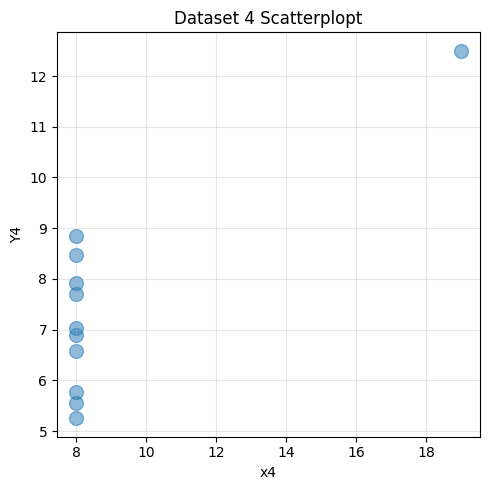

In [70]:
plt.figure(figsize =(5,5))
plt.scatter(dataset4_pd['x4'],dataset4_pd['y4'], alpha = 0.5 , s =100)
plt.xlabel('x4')
plt.ylabel('Y4')
plt.title("Dataset 4 Scatterplopt")
plt.grid(True, alpha = 0.3)
plt.tight_layout()